In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
Thickness = 6.035  # m (6.035mm)
Width = 20  # m (20 mm)
area = Thickness * Width  # Calculate the area of the specimen

# Load tensile test data
df = pd.read_csv('TestData.csv', header=[0, 1])
df.columns = [f"{col[0]} {col[1]}" for col in df.columns]

# Extract relevant columns
time = df["Time (sec)"]
displacement = df["Crosshead separation (mm)"]
force = df["Load (kN)"]
elongation = df["Extensometer elongation (%)"]
strain = elongation/100  # Strain in mm/mm

In [1]:
# Calculate stress and strain
force = force * 1000 # Convert kN to N
stress = (force / area)  # N/m^2 or Pa
uts = stress.max()
elastic_low = 0.1 * uts
elastic_up = 0.4 * uts

elastic_low = 0.1 * uts
elastic_up = 0.4 * uts
elastic_reg = (elastic_low <= stress) & (stress <= elastic_up)

stress_ela = stress[elastic_reg]
strain_ela = strain[elastic_reg] 

E, intercept = np.polyfit(strain_ela, stress_ela, 1)
print(f"Young's Modulus is: {E} MPa",)
E_GPa = E / 1000  # Convert MPa to GPa
print(f"Intercept: {intercept} MPa")

offset_decimal = 0.002  # 0.2% in decimal
offset_line = E * (strain - offset_decimal) + intercept

#Find the Yield strength
diff = stress - offset_line
cross_index = np.where(diff <= 0)[0][0]
x1 = strain[cross_index-1]
x2 = strain[cross_index]
y1 = diff[cross_index-1]
y2 = diff[cross_index]
yield_strain = x1 - y1 * (x2 - x1) / (y2 - y1)
yield_strength = np.interp(yield_strain, strain, stress)

NameError: name 'force' is not defined

Young's Modulus (E): 210.32 GPa
Ultimate Tensile Strength (UTS): 452.29 MPa
Yield Strength: 396.11 MPa


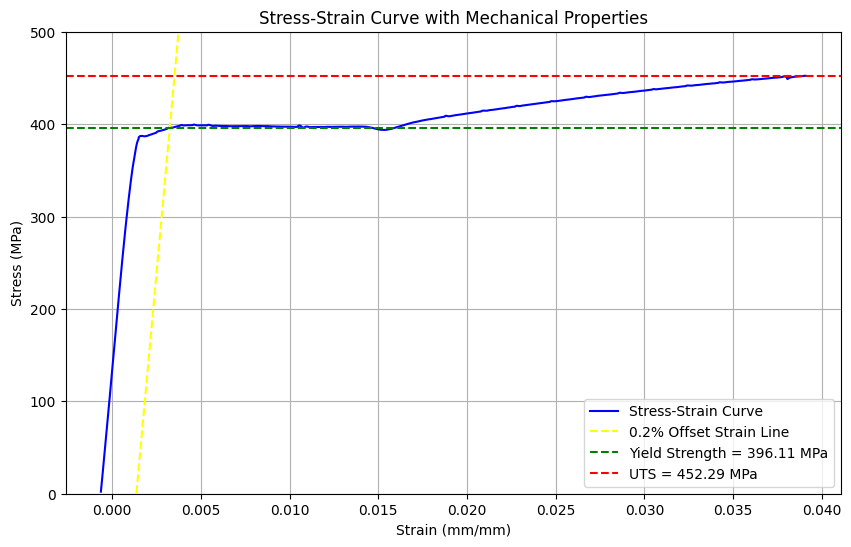

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(strain, stress, label='Stress-Strain Curve', color='blue')
plt.plot(strain, offset_line, label='0.2% Offset Strain Line', color='yellow',linestyle = '--')
plt.axhline(y=yield_strength, label=f'Yield Strength = {yield_strength:.2f} MPa', color='green', linestyle = '--')
plt.axhline(y=uts, color='red', linestyle = '--', label=f'UTS = {uts:.2f} MPa')

plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.title('Stress-Strain Curve with Mechanical Properties')
plt.legend()
plt.grid(True)
plt.ylim(0, 500)
# Print results
print(f"Young's Modulus (E): {E_GPa:.2f} GPa")
print(f"Ultimate Tensile Strength (UTS): {uts:.2f} MPa")
print(f"Yield Strength: {yield_strength:.2f} MPa")